# Plasticity with isotropic hardening

In [1]:
%matplotlib inline

import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from simcoon import simmit as sim
from scipy.interpolate import griddata
import os
from IPython.display import HTML
dir = os.path.dirname(os.path.realpath('__file__'))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

The elastic-plastic (isotropic with kinematical hardening) constitutive law implemented in SMART+ is a rate independent, isotropic, von Mises type material with power-law isotropic hardening. 
Ten parameters are required for the thermomechanical version: 


1. The Young modulus $E$,
2. The Poisson ratio $\nu$,
3. The coefficient of thermal expansion $\alpha$,
4. The von Mises equivalent yield stress limit $\sigma_{Y}$,
5. The activation hardening term $Q$,
6. The coefficient of isotropic hardening $b$,
7. The kinematical hardening coefficient $C_1$, 
8. The hardening accomodation parameter $D_1$
9. The kinematical hardening coefficient $C_2$, 


$$
\dot{\varepsilon}^{\textrm{p}}_{ij}=\dot{p}\Lambda_{ij}, \quad \Lambda^{1}_{ij}=\frac{3}{2}\frac{\sigma'_{ij} - X_{ij}}{\lvert \mathbf{\sigma'} - \mathbf{X} \rvert} - D_1\,a^{1}_{ij}, \quad \Lambda^{1}_{ij}=\frac{3}{2}\frac{\sigma'_{ij} - X_{ij}}{\lvert \mathbf{\sigma'} - \mathbf{X} \rvert} - D_2\,a^{2}_{ij}
$$

$$
\sigma'_{ij}=\sigma_{ij}-\frac{1}{3}\sigma_{kk} \delta_{ij}
$$

$$
{\sigma}_{ij}=L_{ijkl}\left({\varepsilon}^{\textrm{tot}}_{kl}-\alpha_{kl}\left(T-T^{\textrm{ref}}\right)-{\varepsilon}^{\textrm{p}}_{kl}\right)
$$

$$
\dot{\mathbf{a}}^1 = \dot{p}\,\mathbf{\Lambda}^{1}
\dot{\mathbf{X}}^1 = C_1 \quad \frac{2}{3} \dot{p} \mathbf{\Lambda}^{1}
$$

$$
\dot{\mathbf{a}}^2 = \dot{p}\,\mathbf{\Lambda}^{1}
\dot{\mathbf{X}}^2 = C_2 \quad \frac{2}{3} \dot{p} \mathbf{\Lambda}^{1}
$$

In [2]:
umat_name = 'EPCHA' #This is the 5 character code for the elastic-plastic subroutine
nstatev = 40 #The number of scalar variables required, only the initial temperature is stored here

E = 140000
nu = 0.3
alpha = 1.E-6
sigmaY = 200
Q = 1000.
b = 0.5
C_1 = 50000.
D_1 = 200.
C_2 = 10000.
D_2 = 5000.

##local orientation
psi_rve = 0.
theta_rve = 0.
phi_rve = 0.

#Define the properties
props = np.array([E, nu, alpha, sigmaY, Q, b, C_1, D_1, C_2, D_2])
path_data = 'data'
path_results = 'results'

#Run the simulation
pathfile = 'path_id_1.txt'
outputfile = 'results_EPICP1.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, 0, 2, path_data, path_results, pathfile, outputfile)

#Run the simulation
pathfile = 'path_id_2.txt'
outputfile = 'results_EPICP15.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, 0, 2, path_data, path_results, pathfile, outputfile)

#Run the simulation
pathfile = 'path_id_3.txt'
outputfile = 'results_EPICP2.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, 0, 2, path_data, path_results, pathfile, outputfile)

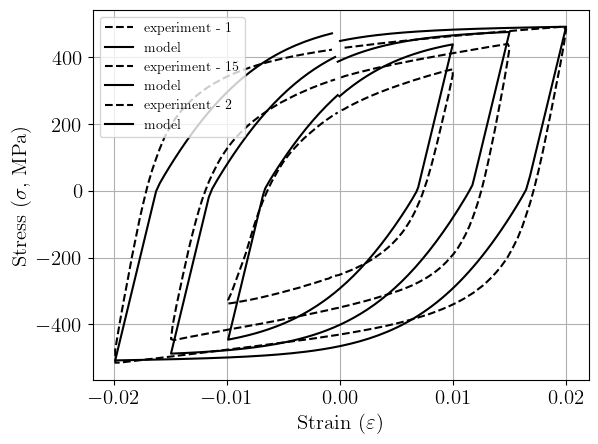

<Figure size 2400x1200 with 0 Axes>

In [3]:
fig = plt.figure()
path = os.path.dirname(os.path.realpath('__file__')) + '/results/'
pylab.rcParams['figure.figsize'] = (24.0, 12.0) #configure the figure output size

pcs = ['1', '15', '2']
#valid = data_path + 'valid.txt'
e11num = []
s11num = []

for p in pcs:
    PL = path + 'results_EPICP' + p + '_global-0.txt'
    e11num_i, s11num_i = np.loadtxt(PL, usecols=(8,14), unpack=True)
    e11num.append(e11num_i)
    s11num.append(s11num_i)

path = os.path.dirname(os.path.realpath('__file__')) + '/exp_data/'

ax = plt.subplot(1,1,1)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Strain ($\varepsilon$)', size = 15)
plt.ylabel(r'Stress ($\sigma$, MPa)', size = 15)

for p in pcs:
    P_global = path + 'exp_file_' + p + '.txt'
    e11exp_i, s11exp_i = np.loadtxt(P_global, usecols=(2,3), unpack=True, skiprows=1)
    plt.plot(e11exp_i, s11exp_i, c='black', ls = '--', label = 'experiment - ' + p)
    plt.plot(e11num[pcs.index(p)], s11num[pcs.index(p)], c='black', label = 'model')

#plt.xlim(330,350)
#plt.ylim(0.09,0.095)
plt.legend(loc=2)

path = os.path.dirname(os.path.realpath('__file__')) + '/results/'
file = 'Figure_results.pdf'
pp = path + file
plt.savefig(pp, format='pdf')
plt.show()


#prepare the load
fig = plt.figure()
pylab.rcParams['figure.figsize'] = (24.0, 12.0) #configure the figure output size
path = dir + '/results/'

outputfile_global1 = 'results_EPICP1_global-0.txt'
P_global1 = path + outputfile_global1
outputfile_global15 = 'results_EPICP15_global-0.txt'
P_global15 = path + outputfile_global15
outputfile_global2 = 'results_EPICP2_global-0.txt'
P_global2 = path + outputfile_global2

plt.show()